## Projet de Graphes

### Représentations graphiques

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Fonction pour calculer la distance entre deux satellites
def calculate_distance(sat1, sat2):
    return np.sqrt((sat1['x'] - sat2['x'])**2 + (sat1['y'] - sat2['y'])**2 + (sat1['z'] - sat2['z'])**2)

# Fonction pour créer les connexions entre satellites en fonction de la portée
def create_connections(data, range_km):
    connections = []
    for i, sat1 in data.iterrows():
        for j, sat2 in data.iterrows():
            if i < j:  # Eviter de vérifier deux fois les mêmes combinaisons
                distance = calculate_distance(sat1, sat2)
                if distance/1000 <= range_km:
                    connections.append((sat1['sat_id'], sat2['sat_id']))
    return connections

import numpy as np

# Fonction pour créer la matrice d'adjacence à partir des connexions
def create_adjacency_matrix(data, range_km):
    # Nombre de satellites
    num_satellites = len(data)
    
    # Créer une matrice carrée de zéros (pas de connexion initiale)
    adj_matrix = np.zeros((num_satellites, num_satellites), dtype=int)
    
    # Créer les connexions
    connections = create_connections(data, range_km)
    
    # Remplir la matrice d'adjacence
    for sat1_id, sat2_id in connections:
        # Trouver les indices des satellites correspondants dans le DataFrame
        sat1_idx = data[data['sat_id'] == sat1_id].index[0]
        sat2_idx = data[data['sat_id'] == sat2_id].index[0]
        
        # Mettre à jour la matrice (connexions bidirectionnelles)
        adj_matrix[sat1_idx, sat2_idx] = 1
        adj_matrix[sat2_idx, sat1_idx] = 1  # Connexion symétrique
    
    return adj_matrix


# Fonction pour afficher le graphe en 3D
def plot_graph_3d(data, connections, title):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Afficher les satellites (points)
    ax.scatter(data['x'], data['y'], data['z'], c='b', s=20, label="Satellites")
    
    # Afficher les connexions (arêtes)
    for conn in connections:
        sat1 = data[data['sat_id'] == conn[0]].iloc[0]
        sat2 = data[data['sat_id'] == conn[1]].iloc[0]
        ax.plot([sat1['x'], sat2['x']], [sat1['y'], sat2['y']], [sat1['z'], sat2['z']], c='r', alpha=0.5)
    
    ax.set_title(title)
    ax.set_xlabel('X (km)')
    ax.set_ylabel('Y (km)')
    ax.set_zlabel('Z (km)')
    plt.legend()
    plt.show()

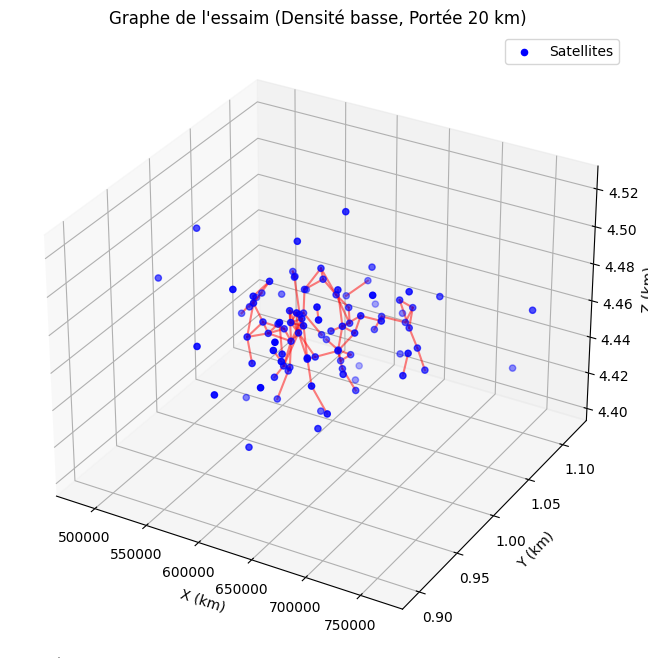

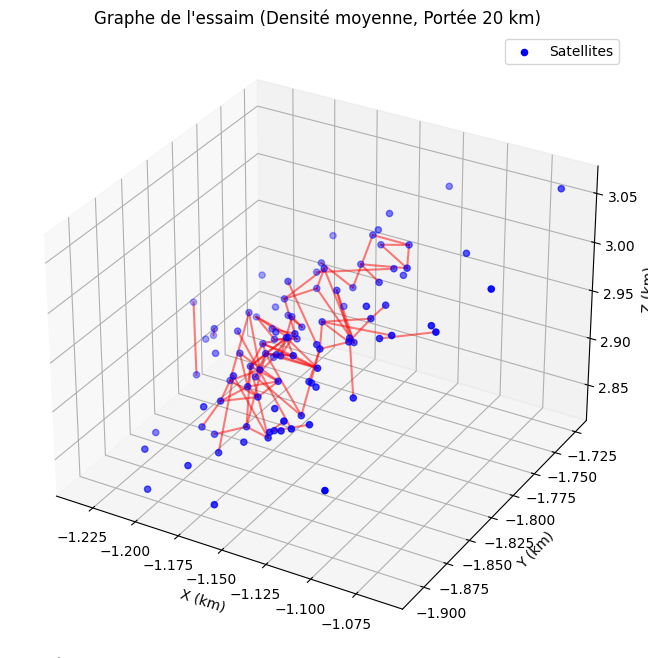

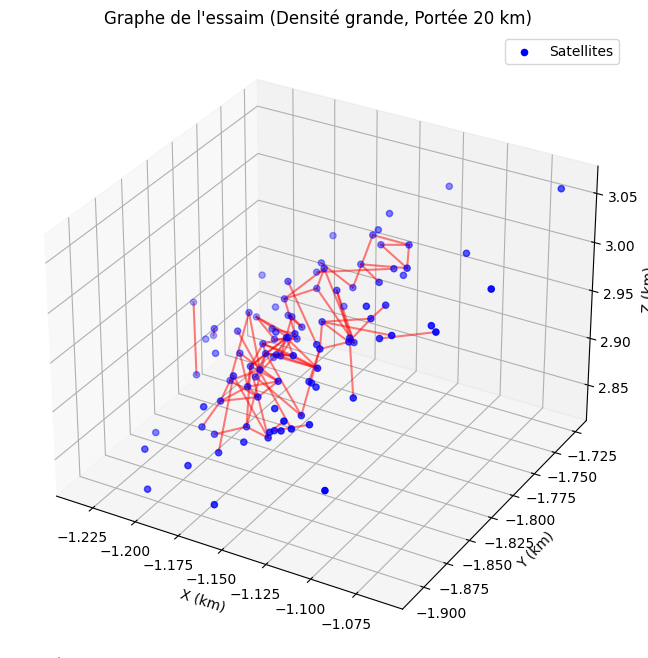

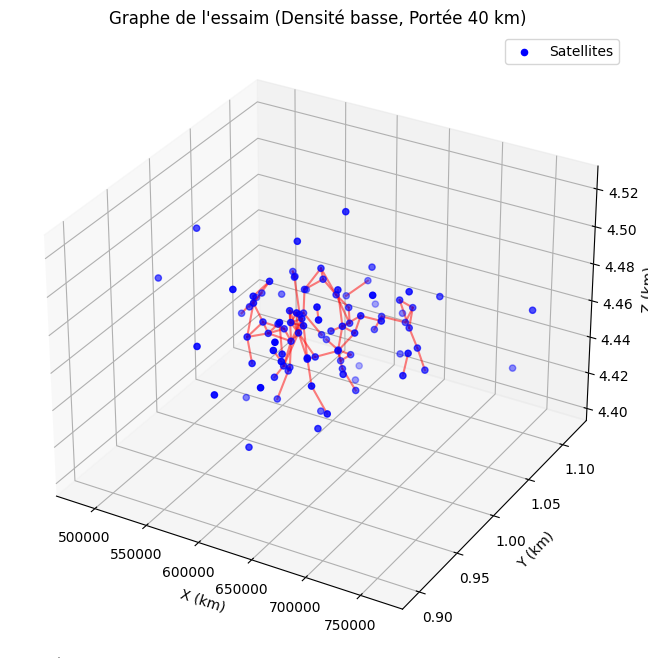

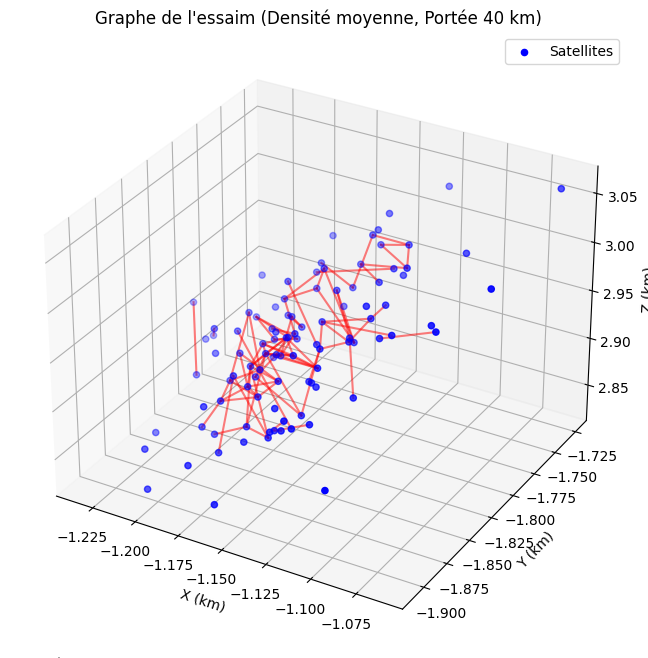

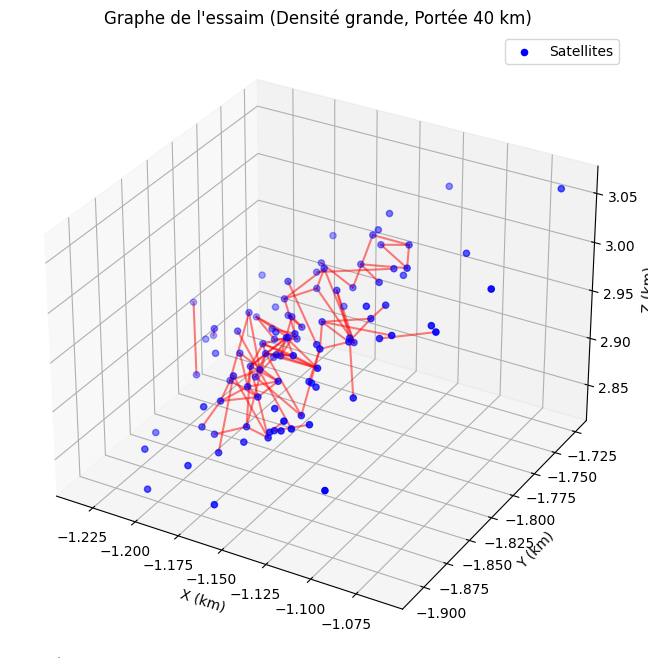

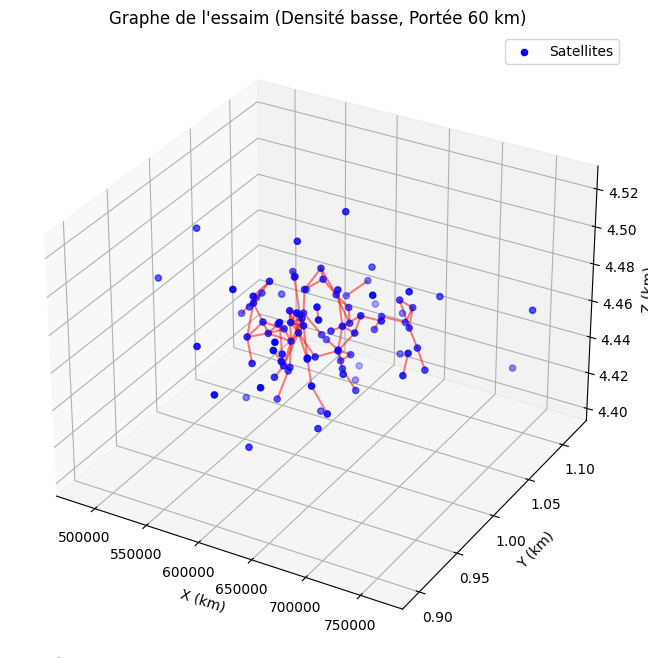

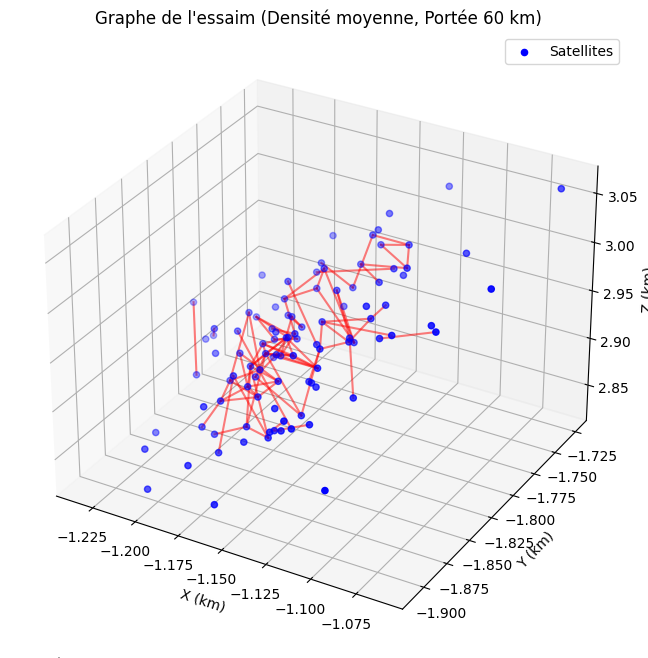

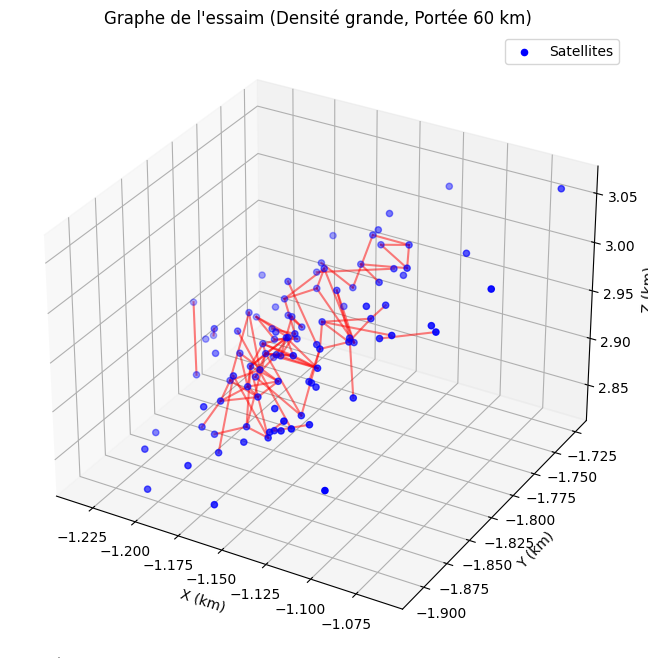

In [15]:
# Charger les données
file_path_low = 'Topologies-20250107/topology_low.csv'
data_low = pd.read_csv(file_path_low)

file_path_avg = 'Topologies-20250107/topology_avg.csv'
data_avg = pd.read_csv(file_path_avg)

file_path_high = 'Topologies-20250107/topology_high.csv'
data_high = pd.read_csv(file_path_high)

# Créer les connexions pour différentes portées et afficher les graphes
for range_km in [20, 40, 60]:
    connections_low = create_connections(data_low, range_km)
    connections_avg = create_connections(data_avg, range_km)
    connections_high = create_connections(data_high, range_km)
    plot_graph_3d(data_low, connections, f"Graphe de l'essaim (Densité basse, Portée {range_km} km)")
    plot_graph_3d(data_avg, connections, f"Graphe de l'essaim (Densité moyenne, Portée {range_km} km)")
    plot_graph_3d(data_avg, connections, f"Graphe de l'essaim (Densité grande, Portée {range_km} km)")

### Etudes des Graphes non valués

#### Degré Moyen

#### Plus court chemins

In [18]:
file_path_low = 'Topologies-20250107/topology_low.csv'
data_low = pd.read_csv(file_path_low)
A = create_adjacency_matrix(data_low,60)
print(A)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 1 0]
 ...
 [0 1 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [19]:
def djikstra(A, source):
    n = length(A)
    
    Dist = []
    Prec = []
    # Initialisation
    for i in range(n):
        Dist[i] = INIFINITY
        Prec[i] = -1
    return 0       
        

### Etudes des Graphes valués